 $\mathbf{\text{Feed forward and Backpropagation algorithm }}$<br>

In [ ]:
#Implementing Forward propagation
  # weight initialization
  w_1 = np.random.randn(64,ni)*np.sqrt(2/512)
  b_1 = np.zeros((64,1))
  w_2 = np.random.randn(no,64)*np.sqrt(2/512)
  b_2 = np.zeros((no,1))
 # Running for total 800 epochs
 for _ in range(800):
      #Batch size is 500
      for  k in range(100):
        # xdata_b stores xdata of 500 size
        xdata_b = xdata[:,k*500:(k+1)*500]
        ydata_vec_b =  ydata_vec[:,k*500:(k+1)*500]
        z_1 = np.dot(w_1,xdata_b) + b_1
        #Relu activation function
        A_1 = np.maximum(z_1, 0)
        z_2 = np.dot(w_2,A_1) + b_2
        # softmax activation function
        A_2 =  np.exp(z_2) / np.sum(np.exp(z_2), axis=0)
        


In [ ]:
# implementing Back propagation
  # dz2 is derivation of loss w.r.t z2 matrix. Detailed derivation is in the report file
  dz2 = A_2 - ydata
  dw2 = (1/m) * np.dot(dz2,A_1.T)
  db2 = (1/m) *np.sum(dz2,axis=1,keepdims=True)
  # d is a matrix stores derivative of relu function w. r .t to z1.
  dz1 = np.dot(w_2.T,dz2)*d
  dw1 = (1/m) *np.dot(dz1,xdata_b.T)
  db1 = (1/m) *np.sum(dz1, axis=1, keepdims=True)
  w_2 = w_2 - learn_rate*dw2
  b_2 = b_2 -  learn_rate*db2
  w_1 = w_1 - learn_rate*dw1
  b_1 = b_1 - learn_rate*db1

 $\mathbf{\text{Training  augmented data set model }}$<br>


In [15]:
# Loading datqset
import numpy as np
from numpy import load
ydata = load('/content/drive/MyDrive/cifbr/ydata.npy')
xdata = load('/content/drive/MyDrive/xaug_data.npy')

In [16]:
# as xdata is 100000 data points whereas ydata has only 500000 data points , 
# we are concatenating two ydata around axis =0 two get the resultant ydata
temp = ydata
ydata = np.concatenate((ydata, temp), axis=0)


In [17]:
# One hot encoding of ydata
ydata_vec = np.zeros((100000,10))
for i in range(100000):
  ydata_vec[i,ydata[i]] = 1

In [18]:
# transposing the xdata and ydata from [None , 512 ] and [None, 10] to [512, None] and [10,None]
xdata = xdata.transpose(1,0)
ydata_vec = ydata_vec.transpose(1,0)

In [19]:
import numpy as np
def mlp(ni,no):
  w_1 = np.random.randn(64,ni)*np.sqrt(2/512)*.01
  b_1 = np.zeros((64,1))
  w_2 = np.random.randn(no,64)*np.sqrt(2/512)*.01
  b_2 = np.zeros((no,1))
  # lis stores the cross entropy loss value each 
  lis = []
  # w_l stores final weight matrix
  w_l = []
  # eps is a small added to the log term in case it becomes zero
  eps = 1e-5
  for _ in range(800):
      for  k in range(200):
        # batch size is 500
        xdata_b = xdata[:,k*500:(k+1)*500]
      
        ydata_vec_b =  ydata_vec[:,k*500:(k+1)*500]
        z_1 = np.dot(w_1,xdata_b) + b_1
        
        A_1 = np.maximum(z_1, 0)
        # d stores derivative of relu function w r t z_1
        d = np.array(z_1 > 0,dtype = np.float32)
        
        z_2 = np.dot(w_2,A_1) + b_2
        A_2 =  np.exp(z_2) / np.sum(np.exp(z_2), axis=0)
        
        m = xdata_b.shape[1]
        # cross entropy loss function
        loss = (-1/m) * np.sum(ydata_vec_b* np.log(A_2))
        dz2 = A_2 - ydata_vec_b
        dw2 = (1/m) * np.dot(dz2,A_1.T)
        db2 = (1/m) *np.sum(dz2,axis=1,keepdims=True)
        dz1 = np.dot(w_2.T,dz2)*d
        dw1 = (1/m) *np.dot(dz1,xdata_b.T)
        
        db1 = (1/m) *np.sum(dz1, axis=1, keepdims=True)
        # weight updation
        w_2 = w_2 - .01*dw2
       
        b_2 = b_2 -  .01*db2
        w_1 = w_1 - .01*dw1
        b_1 = b_1 - .01*db1
        lis.append(loss)
        
  w_l.append([w_1,b_1,w_2,b_2])
  return [lis,w_l]

  

In [20]:
# ni = 512 , no =  10
# x1 stores the weights and loss values for the augmented dataset
x1 = mlp(512,10)

In [21]:
# w1_l stores the weight while l1 stores loss
wl_1 = x1[1]
l1 = x1[0]

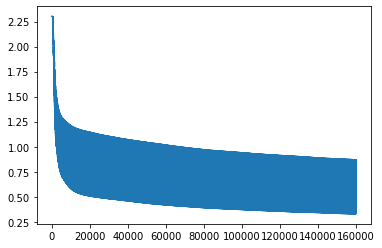

In [22]:
# plot between loss nad number of iterations
l1 = np.array(l1)
import matplotlib.pyplot as plt
import numpy as np
x_c = np.arange(l1.shape[0])
plt.plot(x_c,l1)
plt.show()


  $\mathbf{\text{ Evaluating augmented Model performence }}$<br>

In [23]:
import numpy as np
from numpy import load
xdata_test = load('/content/drive/MyDrive/test_data.npy')
ytest_data = load('/content/drive/MyDrive/ydata_test.npy')


In [24]:
# test data has shape (50000,512) to change it back to (512, 50000)
xdata_test = xdata_test.transpose(1,0)

In [25]:
# assigning weights
w_l1 = np.array(wl_1)
w_1=w_l1[0,0]
b_1=w_l1[0,1]
w_2=w_l1[0,2]
b_2=w_l1[0,3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [26]:
z_1 = np.dot(w_1,xdata_test) + b_1
A_1 = np.zeros((64,xdata_test.shape[1]))
for i in range(64):
    for j in range(xdata_test.shape[1]):
        if(z_1[i,j]>0): 
             A_1[i,j] = z_1[i,j]
z_2 = np.dot(w_2,A_1) + b_2
A_2 =  np.exp(z_2) / np.sum(np.exp(z_2), axis=0)

In [27]:
A_2 = A_2.transpose(1,0)

In [28]:
predict_class = np.argmax(A_2, axis=1)
predict_class = predict_class.tolist()

In [29]:
# Measuring Accuracy
k=0
for i in range(10000):
  if(ytest_data[i] == predict_class[i] ): 
    k=k+1
# ACuracy of Model
print(k)


7979


Accuracy of model trained by Augmented data is 79.35


 $\mathbf{\text{Training Model on unaugmented data }}$<br>

In [1]:
# unaugmented has 50000 size
import numpy as np
from numpy import load
ydata = load('/content/drive/MyDrive/cifbr/ydata.npy')
xdata = load('/content/drive/MyDrive/xunaug_data.npy')

In [2]:
# One hot encoding of ydata
ydata_vec = np.zeros((50000,10))
for i in range(50000):
  ydata_vec[i,ydata[i]] = 1

In [3]:
# transposing the xdata and ydata from [None , 512 ] and [None, 10] to [512, None] and [10,None]
xdata = xdata.transpose(1,0)
ydata_vec = ydata_vec.transpose(1,0)

In [4]:
import numpy as np
def mlp(ni,no):
  w_1 = np.random.randn(64,ni)*np.sqrt(2/512)*.01
  b_1 = np.zeros((64,1))
  w_2 = np.random.randn(no,64)*np.sqrt(2/512)*.01
  b_2 = np.zeros((no,1))
  lis = []
  w_l = []
  eps = 1e-5
  for _ in range(800):
      for  k in range(250):
        xdata_b = xdata[:,k*200:(k+1)*200]
        #print(k)
        ydata_vec_b =  ydata_vec[:,k*200:(k+1)*200]
        z_1 = np.dot(w_1,xdata_b) + b_1
        
        
        A_1 = np.maximum(z_1, 0)
        d = np.array(z_1 > 0,dtype = np.float32)
        
        z_2 = np.dot(w_2,A_1) + b_2
        #print(np.max(z_2))
        A_2 =  np.exp(z_2) / np.sum(np.exp(z_2), axis=0)
        
        m = xdata_b.shape[1]
        
        loss = (-1/m) * np.sum( ydata_vec_b* np.log(A_2  ))
        dz2 = A_2 - ydata_vec_b
        
       
        dw2 = (1/m) * np.dot(dz2,A_1.T)
        db2 = (1/m) *np.sum(dz2,axis=1,keepdims=True)
        dz1 = np.dot(w_2.T,dz2)*d
        
       
        dw1 = (1/m) *np.dot(dz1,xdata_b.T)
        
        db1 = (1/m) *np.sum(dz1, axis=1, keepdims=True)
       
        w_2 = w_2 - .008*dw2
       
        b_2 = b_2 -  .008*db2
        w_1 = w_1 - .008*dw1
        b_1 = b_1 - .008*db1
        lis.append(loss)
        
  w_l.append([w_1,b_1,w_2,b_2])
  return [lis,w_l]

  

In [5]:
# ni = 512 , no =  10
# x2 stores the weights and loss values for the augmented dataset
x2 = mlp(512,10)

In [6]:
wl_2 = x2[1]
l2= x2[0]

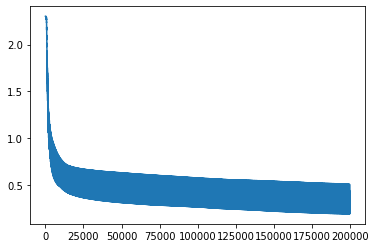

In [7]:
l2 = np.array(l2)
import matplotlib.pyplot as plt
import numpy as np
x_c = np.arange(l2.shape[0])
plt.plot(x_c,l2)
plt.show()

  
 $\mathbf{\text{Evaluation unaugmented model performence }}$<br>

In [7]:
import numpy as np
from numpy import load
xdata_test = load('/content/drive/MyDrive/test_data.npy')
ytest_data = load('/content/drive/MyDrive/ydata_test.npy')

In [8]:
xdata_test = xdata_test.transpose(1,0)

In [14]:
w_l2 = np.array(wl_2)
w_1=w_l2[0,0]
b_1=w_l2[0,1]
w_2=w_l2[0,2]
b_2=w_l2[0,3]

In [15]:
z_1 = np.dot(w_1,xdata_test) + b_1
A_1 = np.zeros((64,xdata_test.shape[1]))
for i in range(64):
    for j in range(xdata_test.shape[1]):
        if(z_1[i,j]>0): 
             A_1[i,j] = z_1[i,j]
z_2 = np.dot(w_2,A_1) + b_2
A_2 =  np.exp(z_2) / np.sum(np.exp(z_2), axis=0)

In [16]:
A_2 = A_2.transpose(1,0)

In [17]:
predict_class = np.argmax(A_2, axis=1)
predict_class = predict_class.tolist()

In [18]:
# K is an integer , whenever ytest_data and predict class has same value , k increses by 1
# thus value of k divided by 100 shows the accuracy of the model
k=0

for i in range(10000):
  if(ytest_data[i] == predict_class[i] ): 
    k=k+1
print(k)

7755


Accuracy of model trained by unaugmented dataset is 77.55